# Determinar la calidad del vino blanco con Regresión Logística, Regresión Lineal y Polinomial: comparación de resultados.

#### Attribute Information:
Input variables (based on physicochemical tests): \ 1 - fixed acidity \ 2 - volatile acidity \ 3 - citric acid \ 4 - residual sugar \ 5 - chlorides \ 6 - free sulfur dioxide \ 7 - total sulfur dioxide \ 8 - density \ 9 - pH \ 10 - sulphates \ 11 - alcohol \ Output variable (based on sensory data): \ 12 - quality (score between 0 and 10) \

#### 00. Agregando librerías

In [648]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics, preprocessing

#### 01. Importando los datos y explorando el DataFrame

In [649]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [650]:
df.tail(15)
# Muestra los últimos 15 registros del DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4883,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,6
4884,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5
4885,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6
4886,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7
4887,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.00,7
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.20,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.80,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.60,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.70,5


In [651]:
df.sample(15)
# Muestra aleatoriamente 15 registros del DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
228,6.4,0.17,0.32,2.4,0.048,41.0,200.0,0.99380,3.50,0.50,9.7,6
4069,6.2,0.24,0.28,12.2,0.049,54.0,133.0,0.99520,3.19,0.37,10.7,6
3654,6.8,0.18,0.32,7.2,0.047,17.0,109.0,0.99498,3.42,0.44,10.4,6
1717,6.8,0.27,0.32,1.5,0.044,19.0,142.0,0.99210,3.10,0.43,9.9,6
2356,7.1,0.34,0.32,2.0,0.051,29.0,130.0,0.99354,3.30,0.50,10.4,6
3880,6.0,0.28,0.24,17.8,0.047,42.0,111.0,0.99896,3.10,0.45,8.9,6
1833,7.4,0.49,0.24,15.1,0.030,34.0,153.0,0.99530,3.13,0.51,12.0,7
288,7.2,0.23,0.39,14.2,0.058,49.0,192.0,0.99790,2.98,0.48,9.0,7
3987,7.3,0.23,0.41,14.6,0.048,73.0,223.0,0.99863,3.16,0.71,9.4,6
2578,5.8,0.30,0.27,1.7,0.014,45.0,104.0,0.98914,3.40,0.56,12.6,7


In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Como podemos observar, el DataFrame no cuenta con registros vacíos o nulos en las 4,898 entradas

In [653]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


De acuerdo con la tabla de arriba, se tiene un total de siete calidades registradas, que van del tres al nueve en pasos de uno. Por lo tanto, el número de clases para este problema es de siete clases posibles en las que el vino puede ser clasificado.

#### 02. Checar si hay registros duplicados

In [654]:
df.shape

(4898, 12)

In [655]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

937


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [656]:
df.drop_duplicates(inplace=True)
df.shape
# 4898 - 937 = 3961

(3961, 12)

El DataFrame contiene un total de 937 elementos duplicados en el paquete de datos. Estos datos fueron removidos del paquete de datos, teniendo un total de 3961 de entradas en el paquete de datos final.

#### 03. Visualización de los datos

<Figure size 864x432 with 0 Axes>

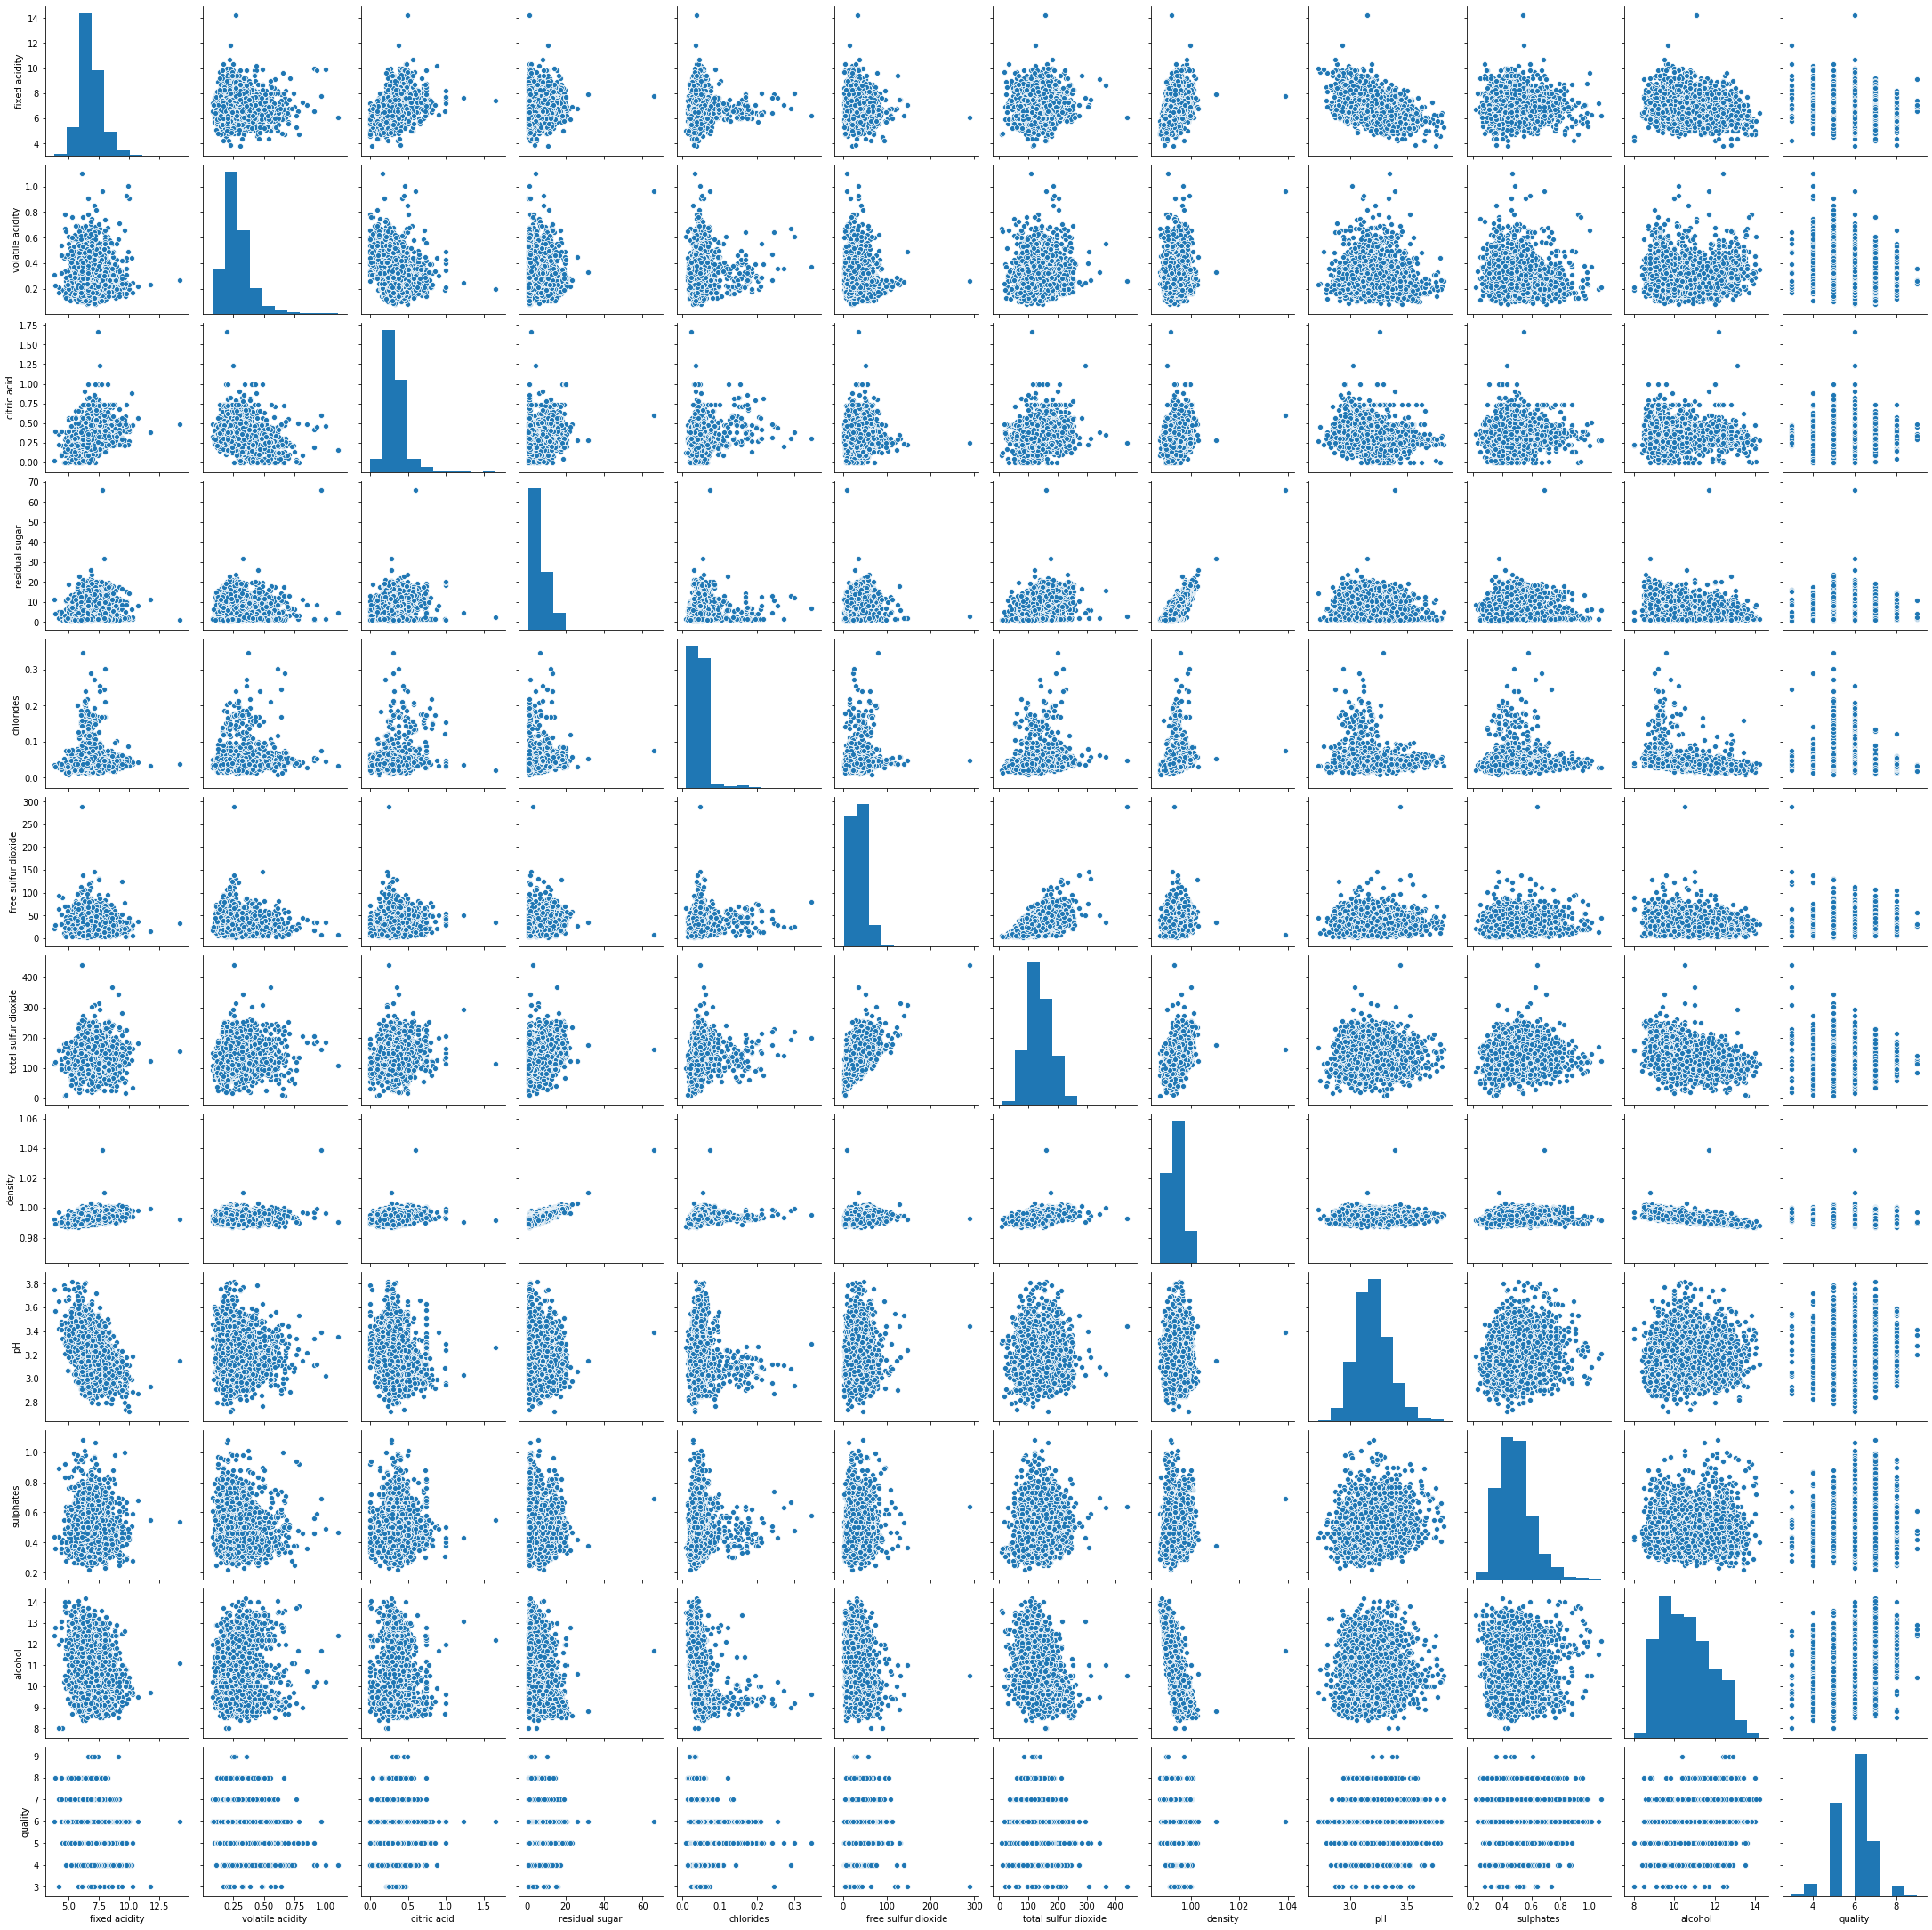

In [657]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

In [658]:
print(df.quality.value_counts())

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


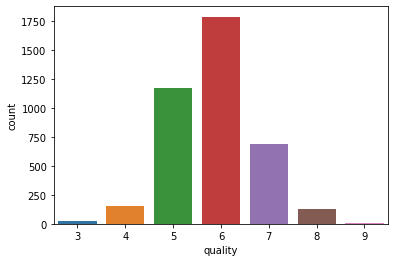

In [659]:
sns.countplot(df['quality'])
plt.show()

Como se puede observar, hay una gran cantidad de registros para los vinos que fueron clasificados con una calidad de seis, cinco y siete. Sin embargo, hubo muy pocos registros para vinos que fueron clasificados con una calidad de nueve, tres y ocho. Esto afectará enórmemente la precisión del modelo ya que carece de información para clasificar correctamente cada clase, sobre todo cuando se trata de vinos con una calidad de cuatro, ocho, tres y nueve, dejándose influenciar en gran medida por las calidades seis, cinco y siete. 

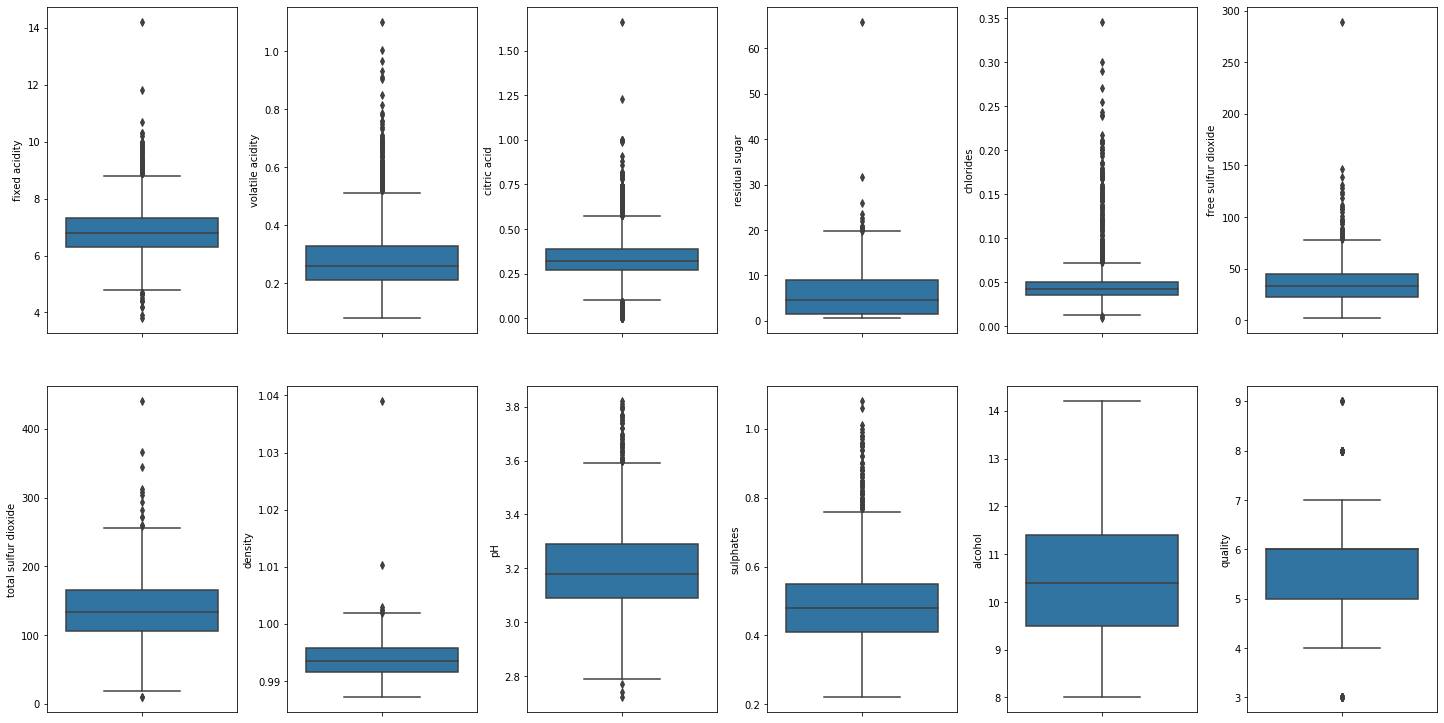

In [660]:
# Crear el diagrama de cajas de cada una de las variables del vino
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

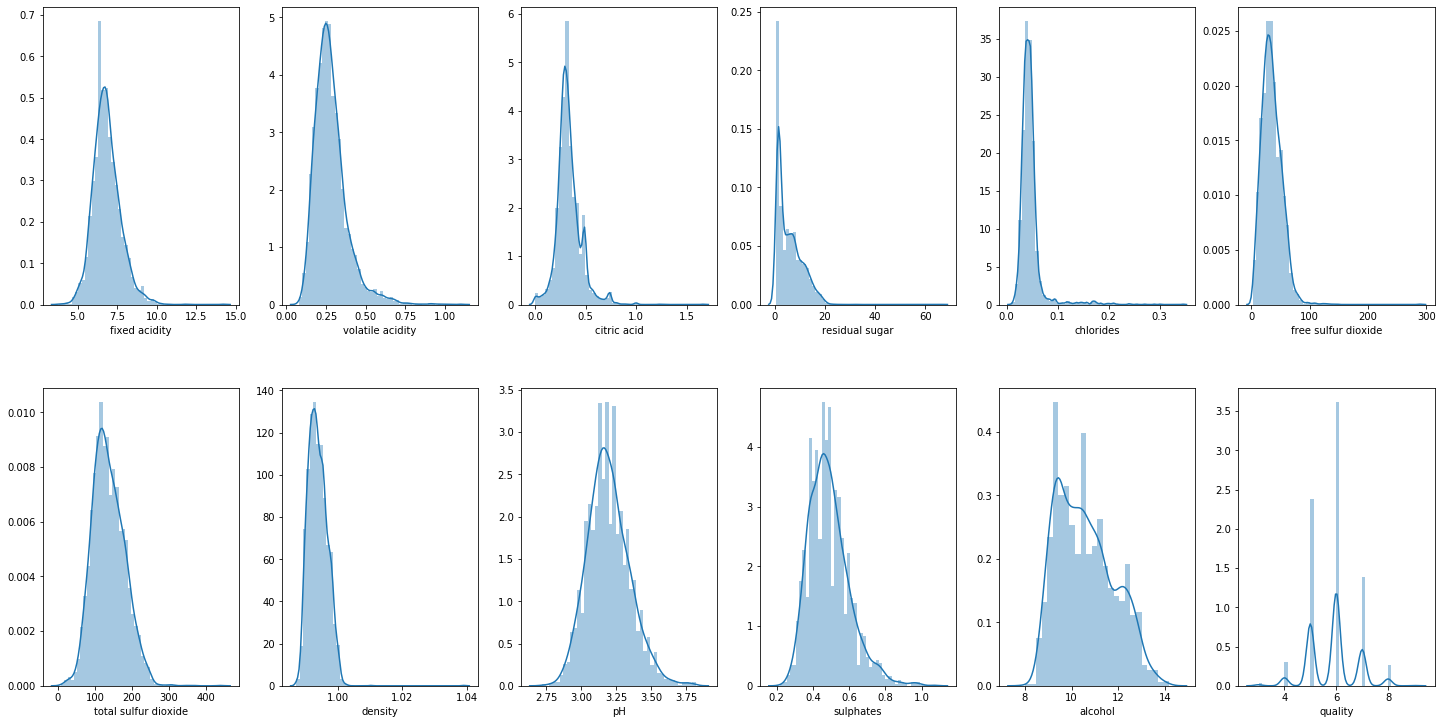

In [661]:
# Crear el histograma de cada una de las variables del vino
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Como se ha podido observar en los diagramas de cajas, la existencia de valores atípicos está presente en cada una de las variables del vino. De igual manera, se puede observar como en los histogramas los valores atípicos afectan la posición de la distribución normal en el eje equis, localizándolo en la mayoría de los casos a la izquierda, cuando lo deseable es que la distribución esté en el centro. Esto se debe, nuevamente, por los valores atípicos positivos. Dichos valores afectan considerablemente la eficacia y precisión del modelo de regresión logistíca. Por lo cual, a continuación, se realizará un pre-procesamiento para reducir dichos valores y localizar la distribución normal lo más cercano posible al centro del eje equis.

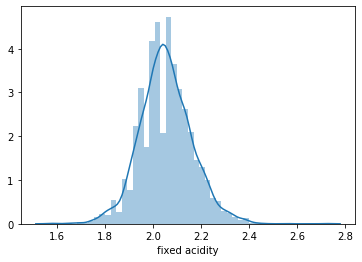

In [662]:
# log transformation
df['fixed acidity'] = np.log(1 + df['fixed acidity'])
sns.distplot(df['fixed acidity'])

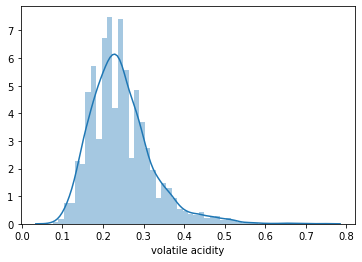

In [663]:
# log transformation
df['volatile acidity'] = np.log(1 + df['volatile acidity'])
sns.distplot(df['volatile acidity'])

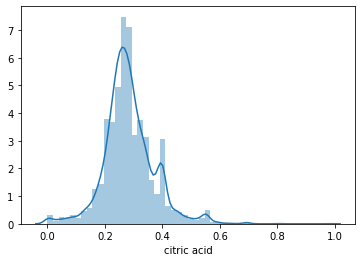

In [664]:
# log transformation
df['citric acid'] = np.log(1 + df['citric acid'])
sns.distplot(df['citric acid'])

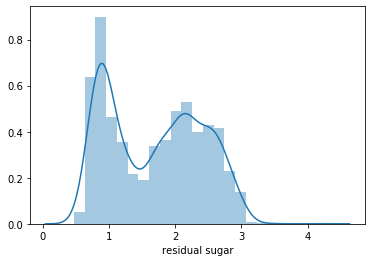

In [665]:
# log transformation
df['residual sugar'] = np.log(1 + df['residual sugar'])
sns.distplot(df['residual sugar'])

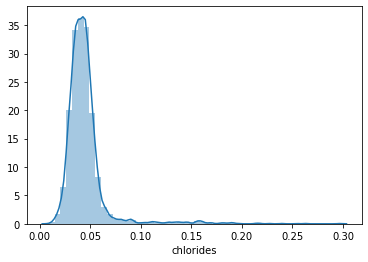

In [666]:
# log transformation
df['chlorides'] = np.log(1 + df['chlorides'])
sns.distplot(df['chlorides'])

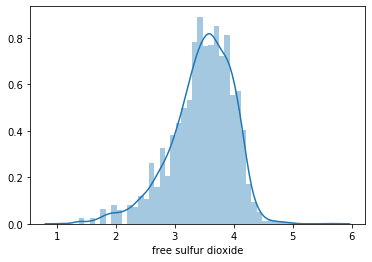

In [667]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])
sns.distplot(df['free sulfur dioxide'])

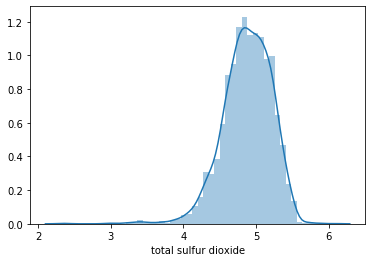

In [668]:
# log transformation
df['total sulfur dioxide'] = np.log(1 + df['total sulfur dioxide'])
sns.distplot(df['total sulfur dioxide'])

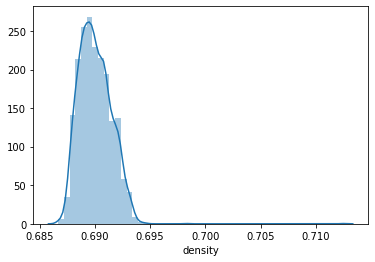

In [669]:
# log transformation
df['density'] = np.log(1 + df['density'])
sns.distplot(df['density'])

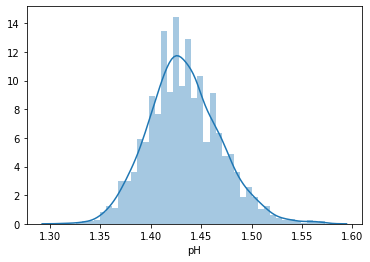

In [670]:
# log transformation
df['pH'] = np.log(1 + df['pH'])
sns.distplot(df['pH'])

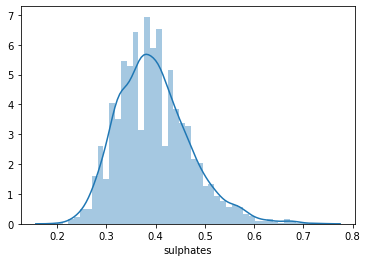

In [671]:
# log transformation
df['sulphates'] = np.log(1 + df['sulphates'])
sns.distplot(df['sulphates'])

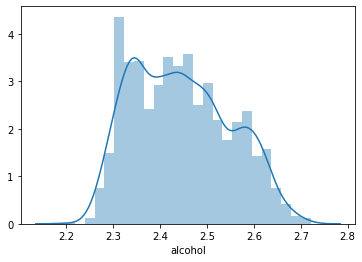

In [672]:
# log transformation
df['alcohol'] = np.log(1 + df['alcohol'])
sns.distplot(df['alcohol'])

#### 04. Matriz de correlación

In [673]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.027168,0.315160,0.078419,0.035050,-0.053137,0.081457,0.274761,-0.439638,-0.015106,-0.112796,-0.120816
volatile acidity,-0.027168,1.000000,-0.186677,0.119549,0.084621,-0.118643,0.079001,0.058041,-0.051349,-0.023383,0.036120,-0.190306
citric acid,0.315160,-0.186677,1.000000,0.076958,0.125397,0.084176,0.117455,0.155841,-0.185983,0.053964,-0.069026,0.022368
residual sugar,0.078419,0.119549,0.076958,1.000000,0.070632,0.320781,0.408579,0.754205,-0.158025,-0.027353,-0.373934,-0.088652
chlorides,0.035050,0.084621,0.125397,0.070632,1.000000,0.093760,0.195749,0.263967,-0.090189,0.024721,-0.372504,-0.224113
free sulfur dioxide,-0.053137,-0.118643,0.084176,0.320781,0.093760,1.000000,0.630933,0.278633,0.016310,0.043828,-0.229819,0.103185
total sulfur dioxide,0.081457,0.079001,0.117455,0.408579,0.195749,0.630933,1.000000,0.508894,0.023511,0.144900,-0.425697,-0.125994
density,0.274761,0.058041,0.155841,0.754205,0.263967,0.278633,0.508894,1.000000,-0.064935,0.090414,-0.765065,-0.338156
pH,-0.439638,-0.051349,-0.185983,-0.158025,-0.090189,0.016310,0.023511,-0.064935,1.000000,0.144643,0.100074,0.124462
sulphates,-0.015106,-0.023383,0.053964,-0.027353,0.024721,0.043828,0.144900,0.090414,0.144643,1.000000,-0.032274,0.048000


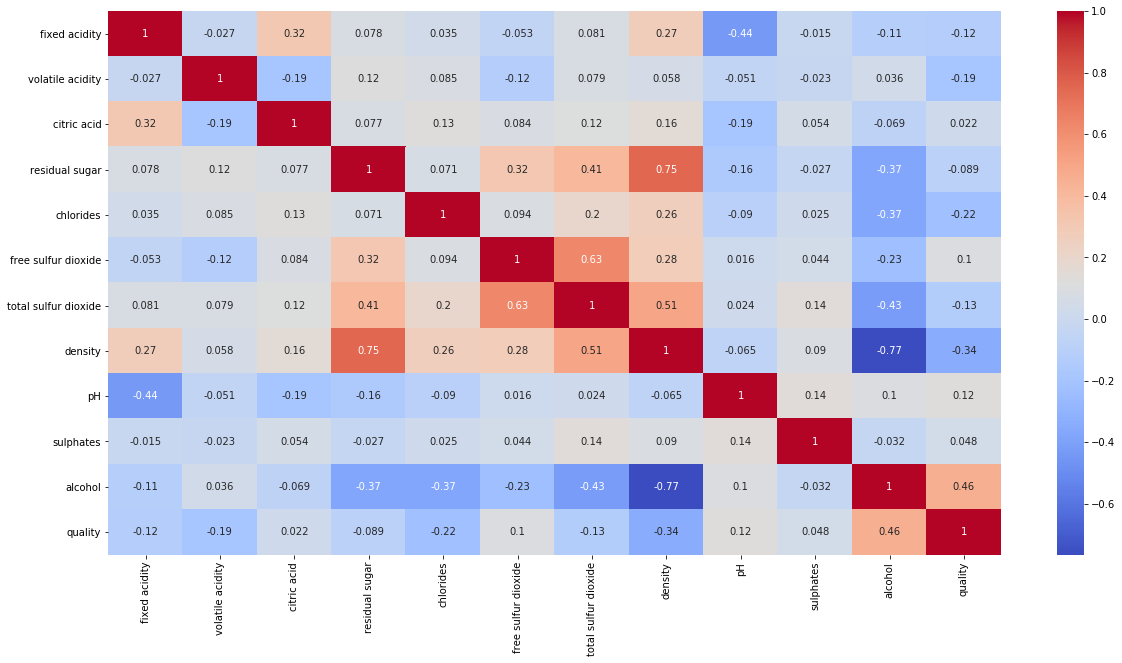

In [674]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### 05. Pre-procesamiento de los datos

In [675]:
# the target column (in this case 'quality') should not be included in variables
#Categorical variables may or maynot be added if any
target = 'quality'
X = df.drop(columns=[target])
y = pd.DataFrame(df[target].values.astype(np.int64), columns=[target])
X.shape, y.shape

((3961, 11), (3961, 1))

A continuación, se aplicará una estandarización a los datos. En este caso, se prefirió utilizar el método estándar en vez del robusto, ya que el robusto estandariza en el quartil central de los datos. Sin embargo, esto ya no es necesario tras el pre-procesamiento de los histogramas que se realizó anteriormente. Este pre-procesamiento de estandarización permite que los datos se distribuyan con una media igual a cero y una desviación estandar igual a uno.

In [676]:
sc = preprocessing.StandardScaler()
sc.fit(X)
x_sc = sc.transform(X)
X = pd.DataFrame(x_sc, columns=X.columns)

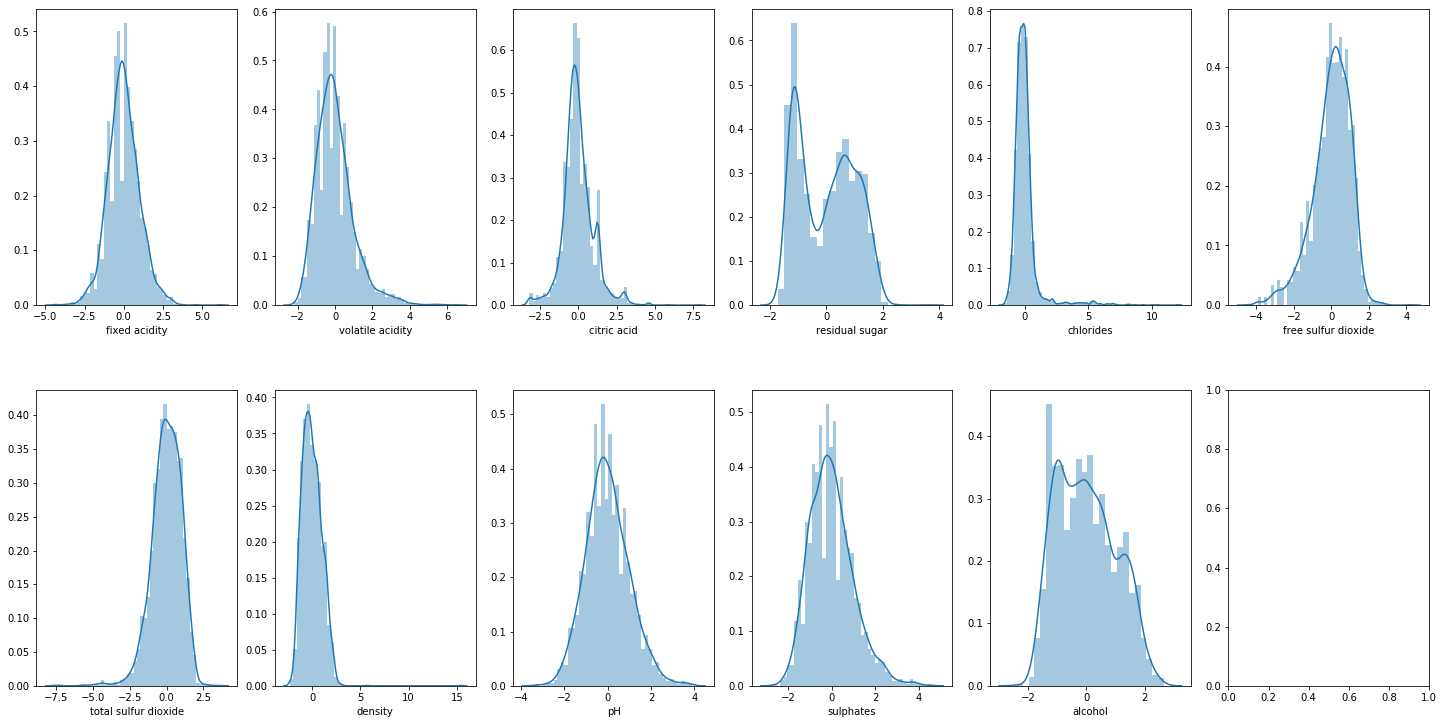

In [677]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Una vez estandarizados, se aplica un escalamiento de tipo MinMax, para que los valores mínimos sean igual o cercanos a cero y los valores máximos igual o cercanos a uno.

In [678]:
min_max = preprocessing.MinMaxScaler()
min_max.fit(x_sc)
x_min_max = min_max.transform(x_sc)
X = pd.DataFrame(x_min_max, columns=X.columns)

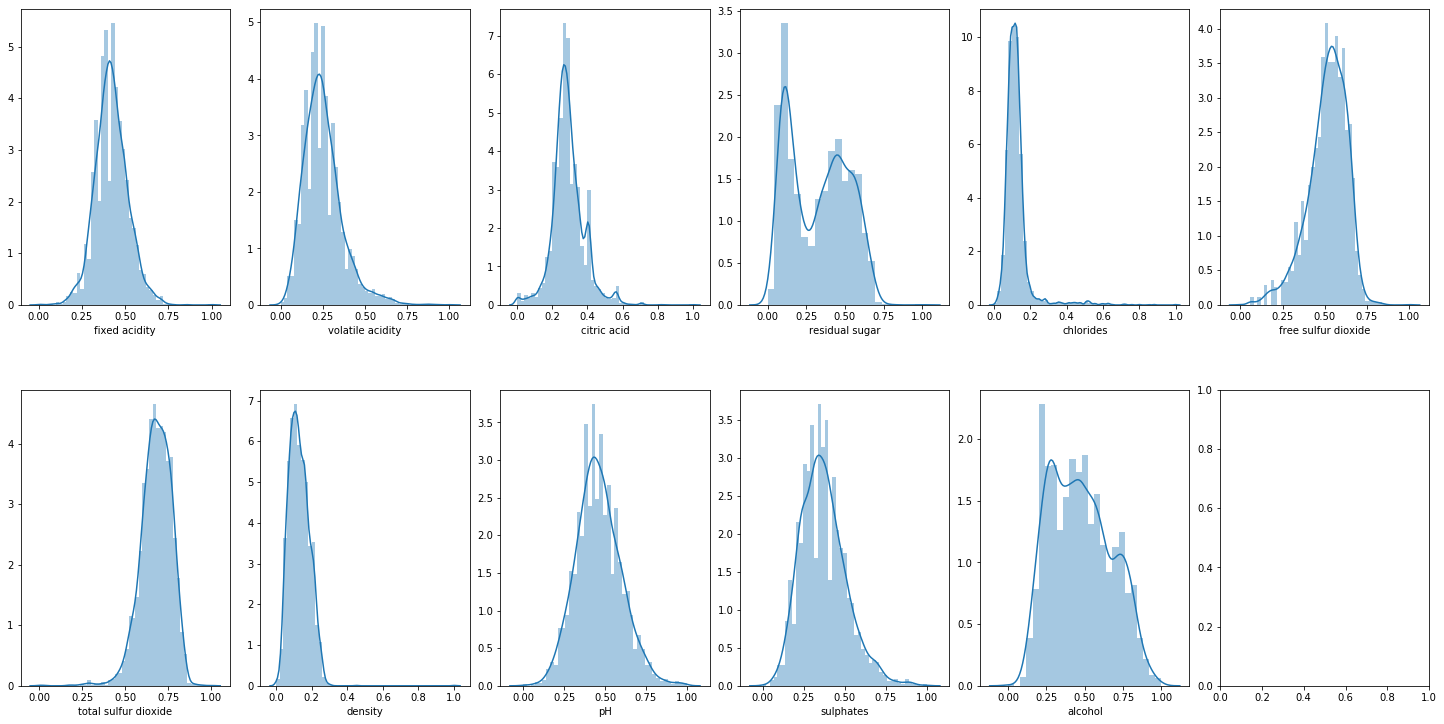

In [679]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Observe como los datos toman valores que van de cero a uno. Este escalamiento es util como una forma de normalizar los datos.

#### 06. VIF
El VIF determina la fuerza de la correlación entre las variables independientes. La puntuación del VIF de una variable independiente representa lo bien que la variable se expone a otras variables independientes.

    El VIF comienza en 1 y no tiene límite superior
    VIF = 1, no hay correlación entre la variable independiente y las demás variables
    VIF superior a 5 o 10 indica un alta multicolinealidad entre esta variable independiente y las demás

In [680]:
x = add_constant(X)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,155.879836,const
1,1.970966,fixed acidity
2,1.173955,volatile acidity
3,1.212843,citric acid
4,4.669427,residual sugar
5,1.227566,chlorides
6,1.861384,free sulfur dioxide
7,2.237167,total sulfur dioxide
8,10.541864,density
9,1.681907,pH


Dado a que la densidad obtuvo un valor de VIF mayor a 10, es recomendable eliminarla del dataframe.

In [681]:
X1 = X.drop(['density'], axis=1)
X1.shape

(3961, 10)

Volvemos a pre-procesar los datos debido a los cambios en el DataFrame.

In [682]:
sc = preprocessing.StandardScaler()
sc.fit(X1)
x1_sc = sc.transform(X1)

min_max = preprocessing.MinMaxScaler()
min_max.fit(x1_sc)
x1_min_max = min_max.transform(x1_sc)

X1 = pd.DataFrame(x1_min_max, columns=X1.columns)

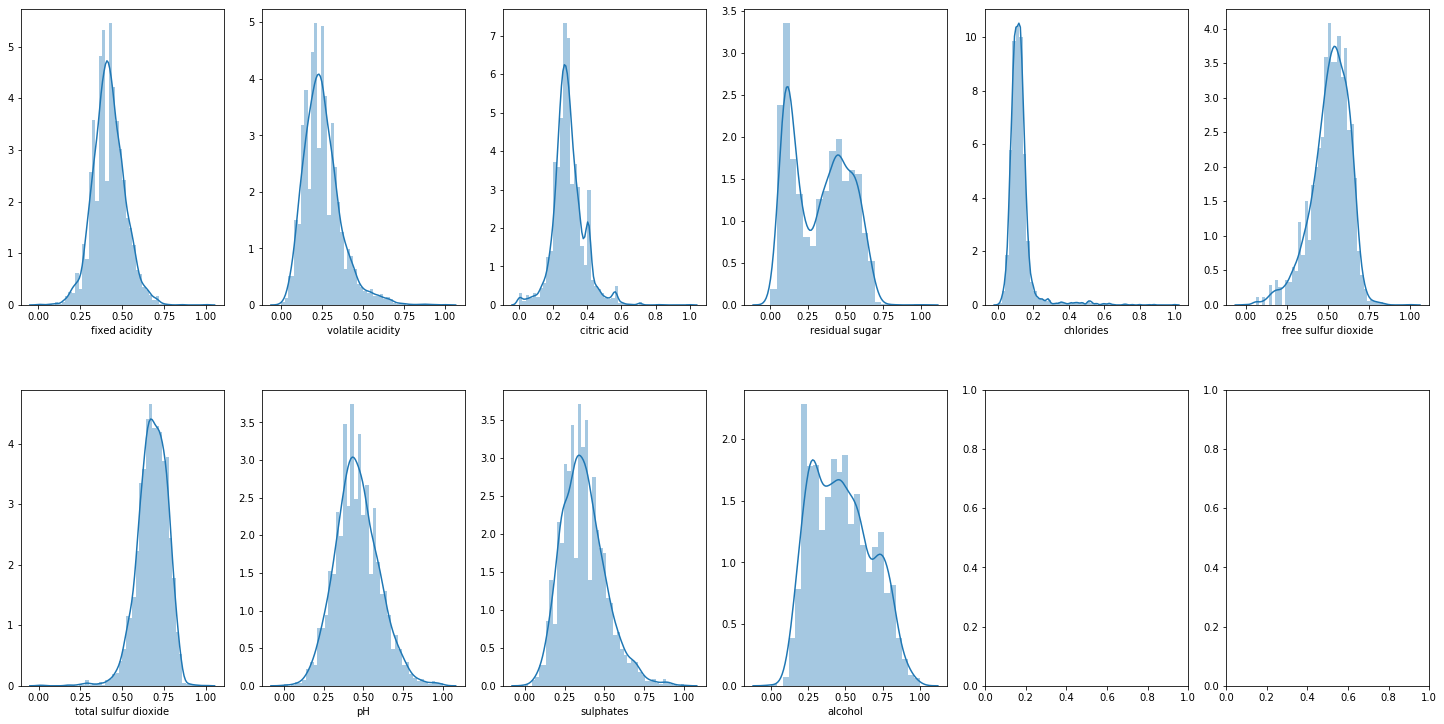

In [683]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X1.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### 07. Datos de entrenamiento y de prueba

Para fines prácticos, la distribución de los datos se hará a partir de dos varibles llamadas "train" y "test". Además, X1 ahora contiene los valores de la calidad. Esto último es por mera utiidad ya que posteriormente será mucho más fácil visualizar el valor verdadero de la calidad y la estimación por parte del modelo de regresión logística.

In [684]:
X1[target] = pd.Series(y[target])
train, test = train_test_split(X1, stratify=X1[target], test_size=0.2, random_state=365)

In [685]:
train.shape, test.shape

((3168, 11), (793, 11))

#### 08. Modelo

In [686]:
variables = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
             "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH", 
             "sulphates", "alcohol"]

reg = LogisticRegression(max_iter=200)
reg.fit(train[variables], train[target])
reg_predictions = reg.predict(test[variables])

In [687]:
test.copy()
test.loc[:, ('reg-predicted')] = reg_predictions
test.head(60)

C:\Users\calix\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\calix\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,reg-predicted
3474,0.398664,0.324385,0.228087,0.345112,0.098328,0.379457,0.660627,0.612809,0.632862,0.787766,6,7
2932,0.375529,0.255496,0.314297,0.097249,0.148115,0.496292,0.773420,0.568284,0.323725,0.516867,5,6
313,0.432251,0.313121,0.194843,0.059797,0.148115,0.566641,0.713427,0.394246,0.323725,0.275881,6,5
2972,0.314836,0.133168,0.252329,0.358626,0.101670,0.619787,0.696972,0.431543,0.310753,0.596054,6,6
478,0.387174,0.255496,0.260284,0.224651,0.098328,0.480660,0.628436,0.577231,0.271292,0.642036,7,6
1178,0.554932,0.145858,0.343926,0.046051,0.094984,0.701217,0.764807,0.337615,0.175850,0.382908,6,6
3,0.464586,0.195576,0.283782,0.477340,0.164553,0.606525,0.773420,0.459282,0.257951,0.365482,6,6
1408,0.535652,0.133168,0.291497,0.085337,0.081573,0.425683,0.524996,0.394246,0.230982,0.467728,7,6
3705,0.573792,0.183299,0.299153,0.072871,0.115004,0.425683,0.649575,0.280141,0.349401,0.417289,6,6
3730,0.573792,0.483950,0.211600,0.419300,0.084930,0.185353,0.730582,0.328095,0.362109,0.580478,5,5


Como se puede apreciar en la tabla de arriba, los valores de prueba son mostrados junto con sus calidades reales y justo a un lado las calidades estimadas por parte del modelo. Se puede observar como el modelo de regresión logística tiene un desempeño aceptable, pero deja mucho que desear.

In [688]:
acc = metrics.accuracy_score(reg_predictions, test[target])# To know the accuracy
acc

0.544766708701135

Conociendo la precisión del modelo, uno puede llegar a entender de por qué algunas veces lo hace bien y otras mal. Este porcentaje bajo de precisión se debe principalmente al desbalance de registros en las clases. Recordemos que, para el caso de la calidad nueve, de los 3,900 datos, tan sólo cinco eran de dicha calidad. Esto afecta considerablemente el modelo porque le hace falta experiencia para estimar correctamente la calidad que le corresponde. Además, por si fuera poco, la correlación que existe entre las variables en relación a la calidad no es muy buena.

#### 09. Matriz de confusión

Ahora, a continuación, se muestra la matriz de confusión del modelo de regresión logística. 

In [689]:
def create_confusion_matrix(actual_data, predicted_data):
    cm = confusion_matrix(actual_data, predicted_data)
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 3','Predicted 4', 'Predicted 5', 'Predicted 6', 
                 'Predicted 7', 'Predicted 8', 'Predicted 9']
    cm_df = cm_df.rename(index={0: 'Actual 3', 1:'Actual 4', 2:'Actual 5', 3:'Actual 6', 
                            4:'Actual 7', 5:'Actual 8', 6:'Actual 9'})
    return cm_df

In [690]:
create_confusion_matrix(train[target], train[target])

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,16,0,0,0,0,0,0
Actual 4,0,122,0,0,0,0,0
Actual 5,0,0,940,0,0,0,0
Actual 6,0,0,0,1430,0,0,0
Actual 7,0,0,0,0,551,0,0
Actual 8,0,0,0,0,0,105,0
Actual 9,0,0,0,0,0,0,4


La tabla de arriba muestra la cantidad de registros con los que el modelo entrenó para cada una de las clases. Observe que la distribución de los registros de entrenamiento está muy desbalanceada.

In [691]:
create_confusion_matrix(test[target],test[target])

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,4,0,0,0,0,0,0
Actual 4,0,31,0,0,0,0,0
Actual 5,0,0,235,0,0,0,0
Actual 6,0,0,0,358,0,0,0
Actual 7,0,0,0,0,138,0,0
Actual 8,0,0,0,0,0,26,0
Actual 9,0,0,0,0,0,0,1


Por otra parte, en esta tabla, muestra la cantidad de registros que fueron puesto a prueba para el modelo de regresión logística.

In [692]:
create_confusion_matrix(test[target], reg_predictions)

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,0,0,2,2,0,0,0
Actual 4,0,1,20,10,0,0,0
Actual 5,0,1,120,114,0,0,0
Actual 6,0,0,62,281,15,0,0
Actual 7,0,0,7,101,30,0,0
Actual 8,0,0,0,19,7,0,0
Actual 9,0,0,0,0,1,0,0


In [693]:
print(classification_report(test[target], y_hat, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         4
           4     0.5000    0.0323    0.0606        31
           5     0.5687    0.5106    0.5381       235
           6     0.5332    0.7849    0.6350       358
           7     0.5660    0.2174    0.3141       138
           8     0.0000    0.0000    0.0000        26
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.5448       793
   macro avg     0.3097    0.2207    0.2211       793
weighted avg     0.5273    0.5448    0.5032       793



C:\Users\calix\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como se puede apreciar,  era de esperarse que los peores resultados se obtuviesen para las calidades en las que se tuvo un total de registros bastante pequeño en comparación al total, tal es el caso de la calidad tres, cuatro, ocho y nueve. Para estas calidades, la precisión es muy mala, ya que más del 95% de las veces el modelo las predice mal. Para la calidad siete el porcentaje de aciertos aumenta pero sigue siendo deficiente. En el caso de la calidad cinco, la mitad de las veces lo hizo bien y en la calidad seis dos tercios del total los clasificó correctamente. Está claro que el modelo es un tanto deficiente y tiene problemas para clasificar los vinos de calidad tres, cuatro, ocho y nueve. Pero, ¿será mejor que los modelos de regresión lineal y polinomial?

#### 10. Modelos de regresión

In [694]:
# Linear method
lr = LinearRegression()
lr.fit(train[variables], train[target])

lr_predictions = lr.predict(test[variables])

In [695]:
# Quadratic method
pr = LinearRegression() 
quadratic = PolynomialFeatures(degree=2)

X_train_quad = quadratic.fit_transform(train[variables])
pr.fit(X_train_quad, train[target])

X_test_quad = quadratic.fit_transform(test[variables])
pr_predictions = pr.predict(X_test_quad)

#### 11. Comparación de resultados entre distintos modelos

In [696]:
lr_predictions = [round(val, 0) for val in lr_predictions]
pr_predictions = [round(val, 0) for val in pr_predictions]

El método "round" redondea hacia arriba cuando el decimal es mayor o igual a 0.5 y redondea hacia abajo cuando es menor a 0.5

In [697]:
test.loc[:, ('lr-predicted')] = lr_predictions
test.loc[:, ('pr-predicted')] = pr_predictions
test.head(60)

C:\Users\calix\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\calix\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,reg-predicted,lr-predicted,pr-predicted
3474,0.398664,0.324385,0.228087,0.345112,0.098328,0.379457,0.660627,0.612809,0.632862,0.787766,6,7,6.0,6.0
2932,0.375529,0.255496,0.314297,0.097249,0.148115,0.496292,0.773420,0.568284,0.323725,0.516867,5,6,6.0,6.0
313,0.432251,0.313121,0.194843,0.059797,0.148115,0.566641,0.713427,0.394246,0.323725,0.275881,6,5,5.0,5.0
2972,0.314836,0.133168,0.252329,0.358626,0.101670,0.619787,0.696972,0.431543,0.310753,0.596054,6,6,6.0,6.0
478,0.387174,0.255496,0.260284,0.224651,0.098328,0.480660,0.628436,0.577231,0.271292,0.642036,7,6,6.0,6.0
1178,0.554932,0.145858,0.343926,0.046051,0.094984,0.701217,0.764807,0.337615,0.175850,0.382908,6,6,6.0,5.0
3,0.464586,0.195576,0.283782,0.477340,0.164553,0.606525,0.773420,0.459282,0.257951,0.365482,6,6,6.0,6.0
1408,0.535652,0.133168,0.291497,0.085337,0.081573,0.425683,0.524996,0.394246,0.230982,0.467728,7,6,6.0,6.0
3705,0.573792,0.183299,0.299153,0.072871,0.115004,0.425683,0.649575,0.280141,0.349401,0.417289,6,6,5.0,6.0
3730,0.573792,0.483950,0.211600,0.419300,0.084930,0.185353,0.730582,0.328095,0.362109,0.580478,5,5,5.0,5.0


In [698]:
reg_acc = metrics.accuracy_score(reg_predictions, test[target])
lr_acc = metrics.accuracy_score(lr_predictions, test[target])
pr_acc = metrics.accuracy_score(pr_predictions, test[target])

print('Accuracy linear: %.4f, quadratic: %.4f, logistic: %.4f' % (lr_acc, pr_acc, reg_acc))

Accuracy linear: 0.5435, quadratic: 0.5460, logistic: 0.5448


Tal como lo podemos observar en la tabla, las predicciones por cada uno de los modelos son muy similares. Incluso, podría decirse que sus valores de "Accuracy" son los mismos. Se cree que algo que pudo haber ayudado a tener mejores resultados en los modelos de regresión lineal y polinomial, fue el hecho de pre-procesar los datos.

#### 12. Matrices de confusión

In [699]:
create_confusion_matrix(test[target], lr_predictions)

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,0,0,2,2,0,0,0
Actual 4,0,2,19,10,0,0,0
Actual 5,0,1,109,124,1,0,0
Actual 6,0,0,50,280,28,0,0
Actual 7,0,0,5,93,40,0,0
Actual 8,0,0,0,17,9,0,0
Actual 9,0,0,0,0,1,0,0


In [700]:
create_confusion_matrix(test[target], pr_predictions)

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,0,1,1,2,0,0,0
Actual 4,0,4,21,6,0,0,0
Actual 5,0,3,103,126,3,0,0
Actual 6,0,0,50,276,32,0,0
Actual 7,0,0,1,88,49,0,0
Actual 8,0,0,0,14,11,1,0
Actual 9,0,0,0,0,1,0,0


In [701]:
create_confusion_matrix(test[target], reg_predictions)

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,0,0,2,2,0,0,0
Actual 4,0,1,20,10,0,0,0
Actual 5,0,1,120,114,0,0,0
Actual 6,0,0,62,281,15,0,0
Actual 7,0,0,7,101,30,0,0
Actual 8,0,0,0,19,7,0,0
Actual 9,0,0,0,0,1,0,0


De acuerdo con cada una de las matrices de confusión, podemos observar como los modelos predicen mejor unas calidades respecto a otras pero con una leve diferencia. Son muy similares los resultados. Tal que así que ninguno de los tres fue capaz de predecir correctamente un vino de calidad tres o nueve. 

### Conclusión
Tras este largo viaje de aprendizaje automático, se han llegado a las siguientes conclusiones. La primera es la importancia de que cada una de las clases tenga en la mayor medida de lo posible un número de registros balanceados. Esto ayudará mucho a que el modelo tenga una mayor experiencia al realizar los entrenamientos para la correcta clasificación y predicción. A falta de registros el modelo tenderá a confudirse mucho para la correcta predicción. Como segunda conclusión destaca el hecho de pre-procesar los datos. Es una parte fundamental del entrenamiento y que tiene igual de importancia como el modelo en sí. Si los datos no se limpian y se trabajan directamente con ellos, se corre el riesgo en desaprovechar la eficiacia del entrenamiento. Como una tercera conclusión es el hecho de presenciar de cómo los modelos de regresión pueden resultar ser una opción para comparar y determinar que tan bueno es un modelo respecto a otro. Lamentablemente, el modelo de Logistic Regression no destacó por encima de los otros. Se tenía la hipótesis de que fuese mucho mejor para las predcciones y resultados fueron muy similares. Se desconoce la razón de por qué pasó esto. En todo caso, este ejercicio fue una buena experiencia para poner en práctica diversos conocimientos de Python y ML. Seguramente, a medida que se vaya avanzando en el curso, existan mejores modelos de entrenamiento o herramientas para pre-procesar mejor los datos. Habrá que ver que nos tiene preparado el futuro.